In [15]:
from Neuron_analysis_tool.load import Analyzer, long_pulse_protocol
from neuron import gui, h
import numpy as np
import os
import matplotlib.pyplot as plt
from copy import deepcopy

In [16]:

def Rin_func(seg):
    imp = h.Impedance(seg.x, sec=seg.sec)
    imp.loc(seg.x, sec=seg.sec)
    imp.compute(0, 1)
    return imp.input(seg.x, sec=seg.sec)


In [17]:

analyser = Analyzer(type='Rall_tree')
colors_dict  = analyser.colors_dict
colors_dict['soma']='r'
colors_dict['basal']='pink'

analyser.change_color_dict(colors_dict)

open_morph:  /ems/elsc-labs/segev-i/yoni.leibner/PycharmProjects/Neuron_analysis_tool/Neuron_analysis_tool/data/Rall_tree5.swc


optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 27195.86it/s]


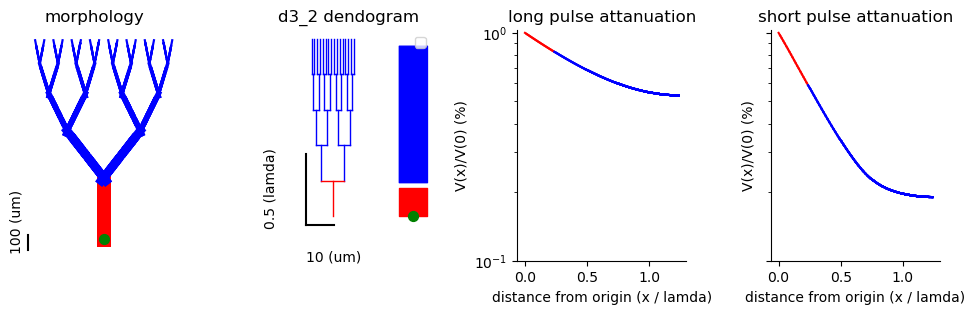

In [4]:
fig, ax = analyser.create_card(scale=100, start_seg=list(analyser.cell.soma[0])[0], diam_factor=1)

optimizing lines: 100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 100871.55it/s]


(<Figure size 1200x300 with 4 Axes>,
 array([<AxesSubplot:title={'center':'morphology'}>,
        <AxesSubplot:title={'center':'d3_2 dendogram'}>,
        <AxesSubplot:title={'center':'long pulse attanuation'}, xlabel='distance from origin (x / lamda)', ylabel='V(x)/V(0) (%)'>,
        <AxesSubplot:title={'center':'short pulse attanuation'}, xlabel='distance from origin (x / lamda)', ylabel='V(x)/V(0) (%)'>],
       dtype=object))

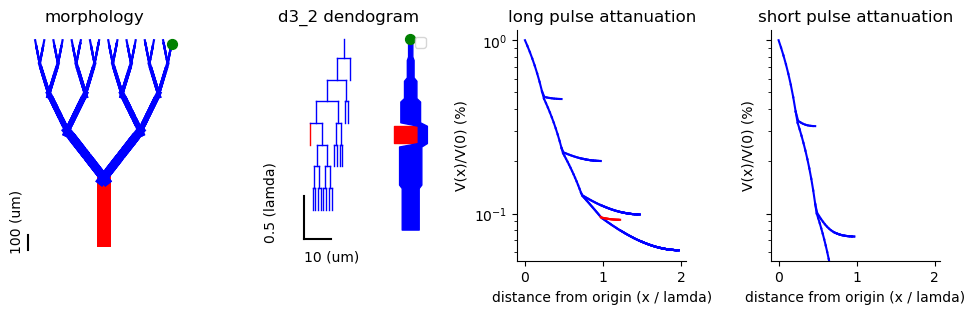

In [5]:
analyser.create_card(scale=100, start_seg=list(analyser.cell.apic[29])[-1], diam_factor=1)

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 29042.53it/s]


Text(0, 0.5, 'Rin (M ohm)')

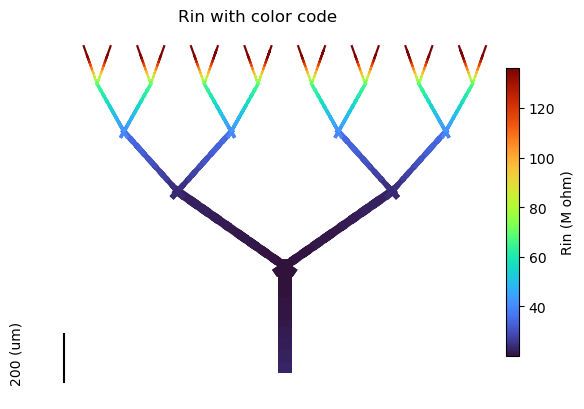

In [6]:
plt.title('Rin with color code')
analyser.plot_morph_with_value_func(func = Rin_func, run_time=1000, theta=0, diam_factor=1, scale=200)
plt.ylabel('Rin (M ohm)')


In [7]:
for sec in analyser.cell.all:
    lamda = ((1.0/sec.g_pas/sec.Ra) * (sec.diam/10000.0/4.0))**0.5 * 10000.0
    print('name:',sec, ', e_length:',round(sec.L/lamda, 3), ', diam:', sec.diam)

name: allen_model[0].soma[0] , e_length: 0.25 , diam: 9.999999999999996
name: allen_model[0].apic[0] , e_length: 0.25 , diam: 6.299600124359128
name: allen_model[0].apic[1] , e_length: 0.25 , diam: 3.968600034713747
name: allen_model[0].apic[2] , e_length: 0.25 , diam: 2.4999999999999996
name: allen_model[0].apic[3] , e_length: 0.25 , diam: 1.5750000476837154
name: allen_model[0].apic[4] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[5] , e_length: 0.25 , diam: 2.499999999999999
name: allen_model[0].apic[6] , e_length: 0.25 , diam: 1.575000047683716
name: allen_model[0].apic[7] , e_length: 0.25 , diam: 1.5750000476837156
name: allen_model[0].apic[8] , e_length: 0.25 , diam: 3.9686000347137433
name: allen_model[0].apic[9] , e_length: 0.25 , diam: 2.5000000000000004
name: allen_model[0].apic[10] , e_length: 0.25 , diam: 1.575000047683716
name: allen_model[0].apic[11] , e_length: 0.25 , diam: 1.5750000476837154
name: allen_model[0].apic[12] , e_length: 0.25 , diam: 

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 91308.58it/s]


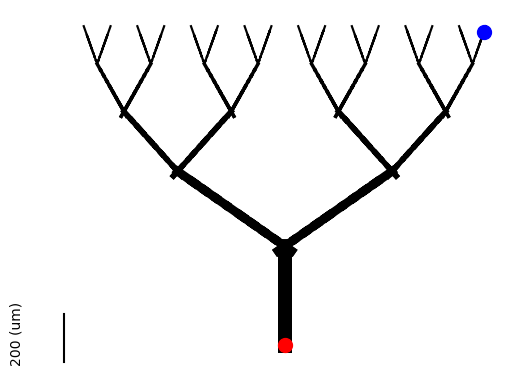

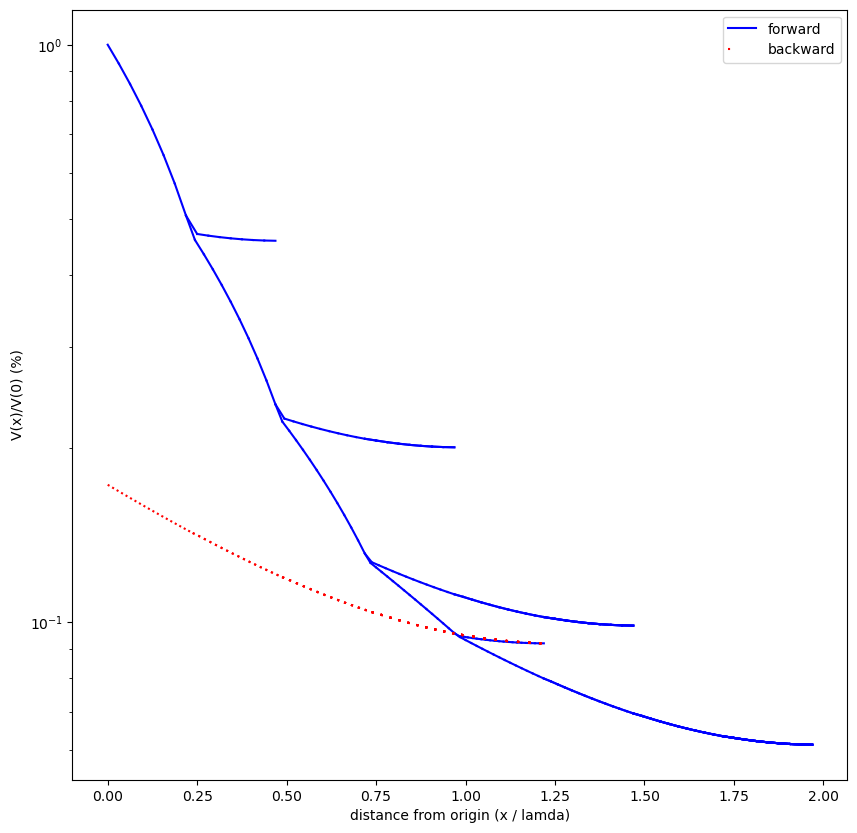

In [21]:
def legend_without_duplicate_labels(ax):
    handles, labels = ax.get_legend_handles_labels()
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    ax.legend(*zip(*unique))

colors_dict = deepcopy(analyser.colors_dict)
plt.figure()
colors_dict1 = {key:'k' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict1)

seg_to_indicate_dict = {list(analyser.cell.soma[0])[0]:dict(size=100, color='r', alpha=1), list(analyser.cell.apic[29])[-1]:dict(size=100, color='b', alpha=1)}
analyser.plot_morph(ax=plt.gca(), theta=0, seg_to_indicate_dict=seg_to_indicate_dict, scale=200, diam_factor=1)


fig, ax = plt.subplots(1, 1, figsize=(10, 10))
colors_dict2 = {key:'b' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict2)

ax, norm_by = analyser.plot_attanuation(protocol=long_pulse_protocol, ax=ax, start_seg=list(analyser.cell.apic[29])[-1], label='forward')

colors_dict3 =  {key:'r' for key in colors_dict.keys()}
analyser.change_color_dict(colors_dict3)
ax, norm_by = analyser.plot_attanuation(protocol=long_pulse_protocol, ax=ax, start_seg=list(analyser.cell.soma[0])[0], norm=False, norm_by=norm_by, ls='--', dashes=(1, 100), label='backward')
analyser.change_color_dict(colors_dict)

ax.legend()
legend_without_duplicate_labels(ax)


In [7]:
colors_dict

{'soma': 'r', 'basal': 'pink', 'apical': 'b', 'axon': 'green', 'else': 'cyan'}

In [4]:
record_dict, time = analyser.record_protocol(cut_start_ms=1000.0)

optimizing lines: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 31/31 [00:00<00:00, 80162.41it/s]


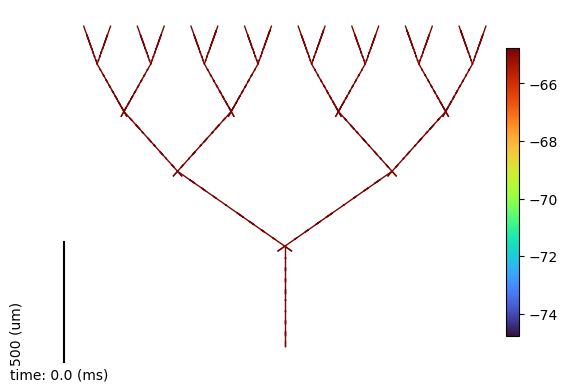

In [5]:
animation = analyser.create_movie_from_rec(record_dict=record_dict, time=time, fps=10, clip_name='spikes_land_mark_optim2', threads=4, slow_down_factor=50, func_for_missing_frames=np.max, theta=0)

In [6]:
animation.ipython_display(fps=10, loop=True, autoplay=True)

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4



Moviepy - Done !
Moviepy - video ready __temp__.mp4


In [8]:
animation.ipython_display(fps=5, loop=True, autoplay=True)

t:   3%|█████                                                                                                                                                         | 1/31 [00:06<03:08,  6.27s/it, now=None]

Moviepy - Building video __temp__.mp4.
Moviepy - Writing video __temp__.mp4




t:  53%|██████████████████████████████████████████████████████████████████████████████████▌                                                                         | 82/155 [00:09<00:08,  8.47it/s, now=None]


t:   3%|█████                                                                                                                                                         | 1/31 [00:24<12:14, 24.48s/it, now=None]

Moviepy - Done !
Moviepy - video ready __temp__.mp4
